In [201]:


import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import os.path
import datetime
import winsound
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import scipy.stats as stats
from scipy.stats import loguniform
from sklearn.inspection import permutation_importance
import sys
from sklearn.model_selection import StratifiedShuffleSplit
import os
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SVMSMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import os.path
from openpyxl import Workbook, load_workbook
import xgboost as xgb
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.svm import LinearSVC
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from sklearn.svm import SVC
from pandas_profiling import ProfileReport
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import pointbiserialr
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
np.set_printoptions(threshold=sys.maxsize, suppress=True)

In [202]:
# After cleaning my initial dataset I saved the data into CSV format again so the cleaned and aligned dataset can act like original source for the other researchers who want to use this dataset.
# Problem, is that saving it to CSV to not preserve datatypes, so I have to make them categorical again.
datatypes = {'business_area': str, 'sex': str, 'employment_status': str,
            'time': str, 'severity': str, 'enterprise_size': str,
            'citizenship': str, 'profession_code': str, 'type_of_injury': str
            , 'injured_bodypart': str, 'workstation': str,
            'working_environment': str, 'working_process': str
            , 'specific_physical_activity': str,
            'material_agent_of_physical_act.': str,
            'deviation': str, 'material_agent_of_deviation': str
            , 'contact_mode_of_injury': str, 'material_agent_of_contact_mode': str, 'general_profession_code': str, 'month': str, 'weekofyear': str, 'dayofweek': str, 'material_agent_of_physical_act': str}

In [203]:
os.chdir('/Users/Mario/OneDrive/Desktop/Final code for thesis')
df = pd.read_csv('data.csv', dtype = datatypes, encoding='latin-1', index_col=0)
df = df.drop(columns= ['date', 'time', 'datetime', 'time_ESAW', 'lost_days', 'type_of_injury', 'injured_bodypart', 'severity'])

In [204]:
sector = 'F'
occup_class = 9
df = df[(df['business_sector'] == sector)].copy()
df = df[(df['general_profession_class'] == occup_class)].copy()
df = df.drop(columns=['business_sector', 'general_profession_class'])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

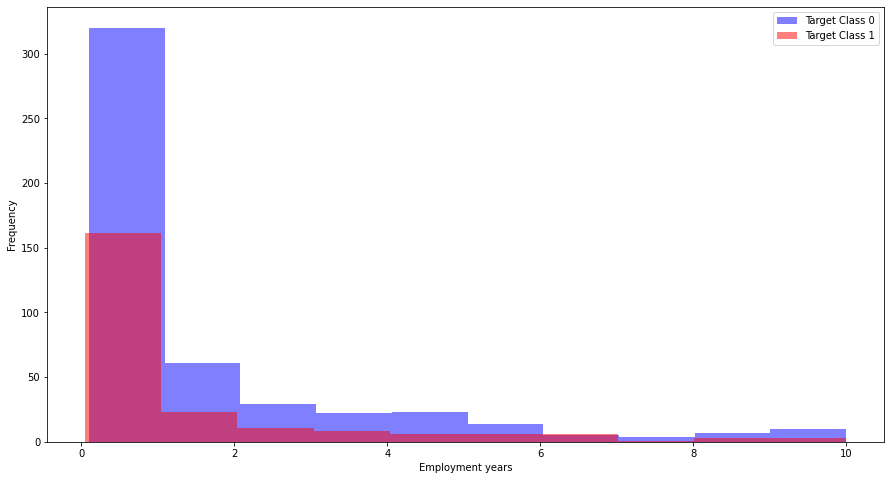

In [205]:
# Filter the data to include only employment years from 0 to 10
df = df[df['employment_years'] <= 10]

# Separate the data into two DataFrames based on the target class
class_0 = df[df['target'] == 0]
class_1 = df[df['target'] == 1]

# Plot the employment years series for both target classes
plt.figure(figsize=(15, 8))
plt.hist(class_0['employment_years'], bins=10, alpha=0.5, label='Target Class 0', color='blue')
plt.hist(class_1['employment_years'], bins=10, alpha=0.5, label='Target Class 1', color='red')

# Customize the plot
plt.xlabel('Employment years')
plt.ylabel('Frequency')
# plt.title('Employment Years Distribution for Target Classes 0 and 1')
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [206]:
# F9 hand-picked features
df = df[['business_area', 'age', 'employment_status', 'employment_years', 'location', 'workstation', 'working_process', 'specific_physical_activity', 'material_agent_of_physical_act', 'deviation', 'material_agent_of_deviation', 'contact_mode_of_injury', 'material_agent_of_contact_mode', 'enterprise_size_ordinal_enc', 'month', 'sin_time', 'cos_time', 'snowfall', 'cause code 001', 'cause code 003', 'cause code 004', 'cause code 008', 'cause code 009', 'cause code 011', 'cause code 015', 'cause code 017', 'target']] 

In [207]:
all_object_cols = list(df.select_dtypes(include=['object']).columns)
df = pd.get_dummies(df, columns=all_object_cols)

# Separate independent variables and dependent variable for train set
X = df.drop(columns=['target'])
y = df['target']

# Balance the target class using random over-sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale float64 variables
float_cols = X_train.select_dtypes(include='float64').columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

NameError: name 'lt' is not defined

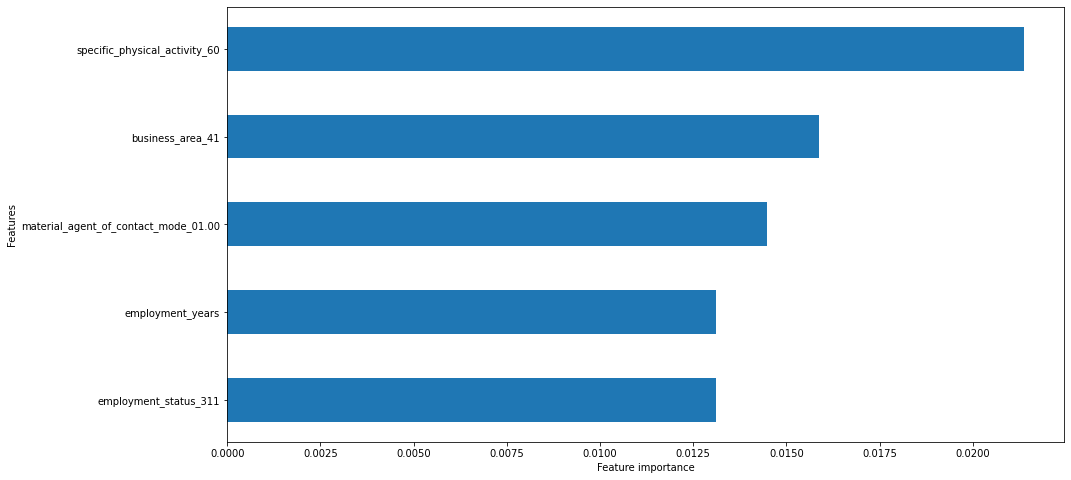

In [208]:
rs = 42
under_sampler = RandomUnderSampler(random_state=rs)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=rs)
xgb_model = xgb.XGBClassifier(random_state=rs)
svm_model = SVC(kernel='rbf', probability=True, random_state=rs)
lr_model = LogisticRegression(max_iter=1000, random_state=rs)
lgbm_model = LGBMClassifier(random_state=rs)

model = lgbm_model

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)   
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)
avg_f1 = f1_score(y_test, y_pred, average='weighted')


precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)



# calculate feature importances for class 0
result_0 = permutation_importance(model, X_test, y_test == 0, n_repeats=10, random_state=0)
importances_0 = result_0.importances_mean

# calculate feature importances for class 1
result_1 = permutation_importance(model, X_test, y_test == 1, n_repeats=10, random_state=0)
importances_1 = result_1.importances_mean

# plot the top 5 features for class 1
sorted_idx_1 = importances_1.argsort()[::-1][:5][::-1]
plt.figure(figsize=(15, 8))
plt.barh(range(5), importances_1[sorted_idx_1], align='center', height=0.5)
plt.yticks(range(5), np.array(X_train.columns)[sorted_idx_1])
plt.xlabel('Feature importance')
plt.ylabel('Features')
lt.title('Top 5 Feature Importances Affecting Target Class 1')
plt.show()


plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('LightGBM ROC Curve')
#plt.text(0.6, 0.2, f"AUC-ROC: {auc_roc:.3f}\nF1 Score (Class 0): {f1_class_0:.3f}\nF1 Score (Class 1): {f1_class_1:.3f}\nAvg F1 Score: {avg_f1:.3f}", fontsize=12, bbox=dict(facecolor='white'))
plt.show()
